## Agglomerative Hierarchical Clustering

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)

### What is Clustering and Why is it Unsupervised?

A technique that is used to divide observations into multiple groups that are different from each other but the observations within same group are similar to each other. The reason why it is an unsupervised technique is because we do not have labels for each of the observations. We let the clustering algorithm to decide on how to group the observations together based on parameters we set. At the end, an analyst can look at the observations to understand the patterns and interpret the clusters based on domain knowledge. Adjusting few parameters in the technique, can result in different number of clusters and also different number of observations within each cluster.

### Hierarchical Clustering

Hierarchical clustering is an unsupervised algorithm that makes the clusters of observations based on hierarchical ordering. There are two types of Hierarchical clustering based the direction you start the ordering.

1. Agglomerative Hierarchical Clustering a.k.a Bottom-Up Approach
2. Divisive Hierachical Clustering a.k.a Top-Down Approach

### Agglemorative Hierarchical Clustering - How does it work?

1. In this approach all the data points / observations start as their own clsuter. If there are N observation then there are N clusters. 
2. The distance between each pair of the clusters is calculated and the cluster pairs with shortest distance are merged into one cluster.
3. Above step (#2) is repeated, growing clsuters until some end point is reached. The end point could be arranging all observations into one cluster.

### Example-1 (Clustering on mtcars Dataset)

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

A data frame with 32 observations on 11 (numeric) variables and one categorical variable.

1. car_name -> Car Name
2. mpg	-> Miles/(US) gallon
3. cyl -> Number of cylinders
4. disp -> Displacement (cu.in.)
5. hp -> Gross horsepower
6. drat -> Rear axle ratio
7. wt -> Weight (1000 lbs)
8. qsec -> 1/4 mile time
9. vs -> Engine (0 = V-shaped, 1 = straight)
10. am -> Transmission (0 = automatic, 1 = manual)
11. gear -> Number of forward gears
12. carb -> Number of carburetors

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Set Defaults

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize = (15, 8))
plt.style.use('seaborn-whitegrid')

<Figure size 1080x576 with 0 Axes>

In [3]:
## Read the dataset
cars = pd.read_csv("data/mtcars.csv")

## Quick observation of top 10 records
cars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
## Let us name the first column as car_name
cars.columns = ['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

## Print the dimensions of the dataset
print('Dimensions of the dataset: {0}'.format(cars.shape))

## Print top 10 records
cars.head(10)

Dimensions of the dataset: (32, 12)


,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


We would like to see if we can make clusters from the data that determine if a vehicle is Auto or Manual. In order to do so, we will take few variables like mpg, disp, hp and wt for determining patterns in data.

In [5]:
## Subset features we want to use for clustering
X = cars.iloc[:, [1,3,4,6]]
X.head(2)

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875


In [6]:
## Store resultant variable into Y
Y = cars.iloc[:, 9]
Y.head(2)

0    1
1    1
Name: am, dtype: int64

### Using Scipy

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')

Linkage methods are used to compute the distance  between two clusters  and . The algorithm begins with a forest of clusters that have yet to be used in the hierarchy being formed. When two clusters  and  from this forest are combined into a single cluster ,  and  are removed from the forest, and  is added to the forest. When only one cluster remains in the forest, the algorithm stops, and this cluster becomes the root.

For the documentation of linkage method, please reference the official documentation by [Clicking Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

There are many methods for combining clusters in agglomerative approach. The one we choose to use is called Ward’s Method. Unlike the other methods, instead of measuring the distance directly, it analyzes the variance of clusters. Ward’s method is said to be the most suitable method for quantitative variables.

Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them:

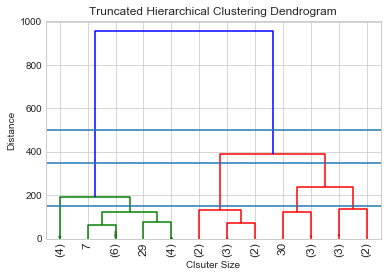

In [13]:
dendrogram(Z, 
           truncate_mode = "lastp", # show only the last p merged clusters
           p = 12, # show only the last p merged clusters
           leaf_rotation=90., 
           leaf_font_size=12., 
           show_contracted=True # to get a distribution impression in truncated branches
          )
           
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Clsuter Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=350)
plt.axhline(y=150)

plt.show()

### How to read the dendogram

* horizontal lines are cluster merges
* vertical lines tell you which clusters/labels were part of merge forming that new cluster
* heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

### Using Scikit Learn

For documentation on AgglomerativeClustering method please refer to the official documentation by [Clicling Here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [14]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as metrics

In [15]:
## fix the number of clusteres that we want to form
k = 2

In [16]:
## Run the clustering with combination of Euclidian (distance/affinity) and Ward (linkage)
HC1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
HC1.fit(X)
metrics.accuracy_score(Y, HC1.labels_)

0.78125

In [17]:
## Run the clustering with combination of Euclidian (distance/affinity) and Complete (linkage)
HC2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
HC2.fit(X)
metrics.accuracy_score(Y, HC2.labels_)

0.4375

In [18]:
## Run the clustering with combination of Euclidian (distance/affinity) and Average (linkage)
HC3 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
HC3.fit(X)
metrics.accuracy_score(Y, HC3.labels_)

0.78125

In [19]:
## Run the clustering with combination of Manhattan (distance/affinity) and Average (linkage)
HC4 = AgglomerativeClustering(n_clusters = k, affinity = 'manhattan', linkage = 'average')
HC4.fit(X)
metrics.accuracy_score(Y, HC4.labels_)

0.71875

In [20]:
## Convert nparray into a data frame
df1 = pd.DataFrame(HC1.labels_, columns=["Predicted"])
## Convert a panda series into a data frame
df2 = Y.to_frame(name = "Actual")
## Merge both dataframes by column
df = pd.concat([df1, df2], axis=1)
df

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,1,0


### Example-2 (Clustering Credit Card Users)

This case requires us to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [21]:
## Read the dataset
cc_users = pd.read_csv("data/CC_GENERAL.csv")
## Quick look at the dataset
cc_users.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Looking at the above data, we realize that CUST_ID variable is of no use and does not make any sense to include in our clustering exercise. So let us remove the variable from the dataset.

In [22]:
## Dropping the Customer ID column
cc_users = cc_users.drop('CUST_ID', axis = 1)

In [23]:
## Let us observer if we have any missing values across 17 variables
cc_users.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Let us impute value '0' for 313 missing values of MINIMUM_PAYMENTS and 1 missing values of CREDIT_LIMIT variable. Please note that one can use any other technique also for imputing missing values. Popular examples of imputing strategies include 

1. Deletion of rows where missing values are found
2. Imputing average (mean) of the feature
3. Imputing median of the feature
4. Imputing mode of the feature
5. Filling with zeroes
6. Regression based imputations
7. Nearest neighbour based imputations
8. Forward filling
9. Backward filling etc... 

Having business context of the problem being solved would help in choosing the right strategy. 

In [24]:
## Impute the missing values in MINIMUM_PAYMENTS variable with '0'
cc_users['MINIMUM_PAYMENTS'] = cc_users['MINIMUM_PAYMENTS'].fillna(0)

## Impute the missing values in CREDIT_LIMIT variable with '0'
cc_users['CREDIT_LIMIT'] = cc_users['CREDIT_LIMIT'].fillna(0)

## Check the dataset again for missing values
cc_users.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Standardizing data
std_cc_users = pd.DataFrame(StandardScaler().fit_transform(cc_users), columns=cc_users.columns)
std_cc_users.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960213,-0.528979,-0.297310,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688718,0.818642,0.102042,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826129,-0.383805,-0.088489,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826129,-0.598688,-0.357035,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905249,-0.364368,-0.252238,-0.525551,0.36068
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740356,-0.115060,0.673526,-0.525551,0.36068
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475061,1.596313,-0.272241,2.893453,0.36068
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.602945,-0.364116,-0.129267,-0.525551,0.36068
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688718,-0.360933,-0.223481,-0.525551,0.36068
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788006,-0.196336,-0.314095,-0.525551,0.36068


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9, random_state = 1234)
pca_std_cc_users = pca.fit_transform(std_cc_users)
print(pca.explained_variance_ratio_)

[0.273  0.2032 0.0883 0.0748 0.062  0.0573 0.0488 0.0432 0.0378 0.0308]


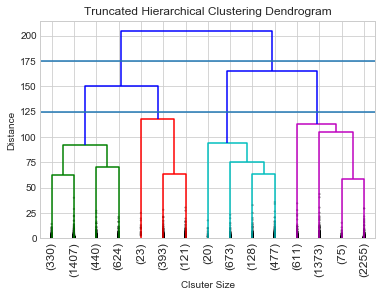

In [27]:
model = linkage(pca_std_cc_users, method ='ward')
dendrogram(model, 
           truncate_mode = "lastp", # show only the last p merged clusters
           p = 15, # show only the last p merged clusters
           leaf_rotation=90., 
           leaf_font_size=12., 
           show_contracted=True # to get a distribution impression in truncated branches
          )
           
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Clsuter Size")
plt.ylabel("Distance")

plt.axhline(y=125)
plt.axhline(y=175)

plt.show()


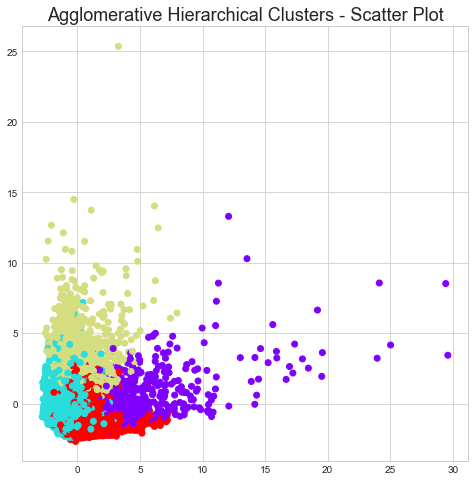

In [28]:
df_pca = pd.DataFrame(pca_std_cc_users)
df_pca.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']

#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

### Further Improvement Ideas

1. Identify outliers in each feature and treat them


2. Use better imputation approach for missing values


3. Use different distance and linkage methods


4. Try with other clustering algorithms



### Drawbacks of Agglomeratie Hierarchical Clustering

1. Agglomerative Clustering can be computationally intensive and have large storage requirements. This is especially true for big data. 


2. Also, merging can’t be reversed, which can create a problem if you have noisy, high-dimensional data. The algorithm can never undo any previous steps. So for example, the algorithm clusters 2 points, and later on we see that the connection was not a good one, the program cannot undo that step.


3. Use of different distance metrics for measuring distances between clusters may generate different results. Performing multiple experiments and comparing the results is recommended.